<a href="https://colab.research.google.com/github/Yannan-Chen/allenVisualBehaviorOphys/blob/main/dataLoader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# @title Install packages
# Might need to run twice to get everything right
!pip install pip --upgrade --quiet
!pip install mindscope_utilities --quiet
!pip install pandas --quiet
!pip install seaborn --quiet

In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.manifold import TSNE

import mindscope_utilities
import mindscope_utilities.visual_behavior_ophys as ophys

from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

pd.set_option('display.max_columns', 500)

In [4]:
data_storage_directory = "/temp"  # Note: this path must exist on your local drive
cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

ophys_session_table.csv: 100%|██████████| 227k/227k [00:00<00:00, 1.52MMB/s] 
behavior_session_table.csv: 100%|██████████| 1.21M/1.21M [00:00<00:00, 6.70MMB/s]
ophys_experiment_table.csv: 100%|██████████| 610k/610k [00:00<00:00, 4.06MMB/s] 
ophys_cells_table.csv: 100%|██████████| 4.29M/4.29M [00:00<00:00, 13.1MMB/s]


In [5]:
session_table = cache.get_ophys_session_table()
experiment_table = cache.get_ophys_experiment_table()

In [6]:
session_sst = session_table[['Sst' in session_table.loc[i].driver_line[0] for i in session_table.index]]
session_slc = session_table[['Slc' in session_table.loc[i].driver_line[0] for i in session_table.index]]
session_vip = session_table[['Vip' in session_table.loc[i].driver_line[0] for i in session_table.index]]

print('SST', len(session_sst))
print('Slc', len(session_slc))
print('Vip', len(session_vip))

SST 158
Slc 361
Vip 186


In [7]:
sst_sessions = np.unique(np.array(session_sst.index))
session_sst.head()

,equipment_name,full_genotype,mouse_id,reporter_line,driver_line,sex,age_in_days,cre_line,indicator,session_number,prior_exposures_to_session_type,prior_exposures_to_image_set,prior_exposures_to_omissions,behavior_session_id,ophys_experiment_id,ophys_container_id,project_code,date_of_acquisition,session_type
ophys_session_id,,,,,,,,,,,,,,,,,,,
951410079,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,206.0,Sst-IRES-Cre,GCaMP6f,1.0,0.0,65.0,0.0,951520319,"[951980471, 951980473, 951980475, 951980479, 9...","[1018028360, 1018028345, 1018028357, 101802834...",VisualBehaviorMultiscope,2019-09-20 09:45:29.897856,OPHYS_1_images_A
952430817,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,209.0,Sst-IRES-Cre,GCaMP6f,2.0,0.0,66.0,1.0,952554548,"[953659743, 953659745, 953659749, 953659752]","[1018028357, 1018028345, 1018028339, 1018028354]",VisualBehaviorMultiscope,2019-09-23 08:13:07.627573,OPHYS_2_images_A_passive
954954402,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,210.0,Sst-IRES-Cre,GCaMP6f,3.0,0.0,67.0,2.0,953982960,"[958527464, 958527471, 958527474, 958527479, 9...","[1018028360, 1018028342, 1018028357, 101802835...",VisualBehaviorMultiscope,2019-09-24 16:00:00.000000,OPHYS_3_images_A
955775716,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,212.0,Sst-IRES-Cre,GCaMP6f,3.0,1.0,68.0,3.0,956010809,"[956941841, 956941844, 956941846]","[1018028342, 1018028339, 1018028345]",VisualBehaviorMultiscope,2019-09-26 08:44:37.199778,OPHYS_3_images_A
957020350,MESO.1,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,457841,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],F,213.0,Sst-IRES-Cre,GCaMP6f,4.0,0.0,0.0,4.0,957032492,"[957759562, 957759564, 957759566, 957759570, 9...","[1018028354, 1018028345, 1018028360, 101802834...",VisualBehaviorMultiscope,2019-09-27 08:28:05.415005,OPHYS_4_images_B


In [ ]:
ophys_session_id = 951410079


In [8]:
all_cell_specimen_id = []
allNeural_data = []
for ophys_session_id in [sst_sessions[0]]:

  neural_data = []
  ophys_experiment_ids = session_table.loc[ophys_session_id]['ophys_experiment_id']
  for ophys_experiment_id in ophys_experiment_ids:
    this_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id)

    this_experiment_neural_data = ophys.build_tidy_cell_df(this_experiment)

    # add some columns with metadata for the experiment
    metadata_keys = [
        'ophys_experiment_id',
        'ophys_session_id',
        'targeted_structure',
        'imaging_depth',
        'equipment_name',
        'cre_line',
        'mouse_id',
        'sex',
    ]
    for metadata_key in metadata_keys:
      this_experiment_neural_data[metadata_key] = this_experiment.metadata[metadata_key]

    # append the data for this experiment to a list
    neural_data.append(this_experiment_neural_data)

  # concatate the list of dataframes into a single dataframe
  neural_data = pd.concat(neural_data)
  allNeural_data += [neural_data]
  all_cell_specimen_id += [neural_data.cell_specimen_id.unique()]

behavior_ophys_experiment_850517344.nwb: 100%|██████████| 236M/236M [00:09<00:00, 25.6MMB/s]
behavior_ophys_experiment_850517346.nwb: 100%|██████████| 262M/262M [00:10<00:00, 24.7MMB/s]
behavior_ophys_experiment_850517348.nwb: 100%|██████████| 242M/242M [00:09<00:00, 26.6MMB/s]
behavior_ophys_experiment_850517350.nwb: 100%|██████████| 266M/266M [00:09<00:00, 26.7MMB/s]
behavior_ophys_experiment_850517352.nwb: 100%|██████████| 246M/246M [00:09<00:00, 25.3MMB/s]
behavior_ophys_experiment_850517354.nwb: 100%|██████████| 251M/251M [00:10<00:00, 24.7MMB/s]
/usr/local/lib/python3.7/dist-packages/allensdk/brain_observatory/behavior/data_objects/stimuli/presentations.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_change'] = is_change_event(s

In [12]:
neural_data.iloc[:,3:]

,filtered_events,cell_roi_id,cell_specimen_id,ophys_experiment_id,ophys_session_id,targeted_structure,imaging_depth,equipment_name,cre_line,mouse_id,sex
0,0.0,1080857656,1086550481,850517344,849304162,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
1,0.0,1080857656,1086550481,850517344,849304162,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
2,0.0,1080857656,1086550481,850517344,849304162,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
3,0.0,1080857656,1086550481,850517344,849304162,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
4,0.0,1080857656,1086550481,850517344,849304162,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
...,...,...,...,...,...,...,...,...,...,...,...
48371,0.0,1080854667,1086550473,850517358,849304162,VISl,75,MESO.1,Sst-IRES-Cre,440631,M
48372,0.0,1080854667,1086550473,850517358,849304162,VISl,75,MESO.1,Sst-IRES-Cre,440631,M
48373,0.0,1080854667,1086550473,850517358,849304162,VISl,75,MESO.1,Sst-IRES-Cre,440631,M
48374,0.0,1080854667,1086550473,850517358,849304162,VISl,75,MESO.1,Sst-IRES-Cre,440631,M


In [39]:
all_cell_specimen_id = np.unique(neural_data.cell_specimen_id)
neural_data_cleaned = pd.DataFrame({})
for cell_specimen_id in all_cell_specimen_id:
  cell_data = neural_data.loc[neural_data.cell_specimen_id == cell_specimen_id]
  neural_data_cleaned_single = pd.concat((pd.DataFrame({
      'timestamps': [cell_data.timestamps],
      'dff': [cell_data.dff],
      'events': [cell_data.events],
      'filtered_events': [cell_data.filtered_events],
  }), pd.DataFrame(cell_data.iloc[0,4:]).transpose()), axis = 1)
  neural_data_cleaned = pd.concat([neural_data_cleaned, neural_data_cleaned_single], axis = 0)
from google.colab import files

with open('example.txt', 'w') as f:
  f.write('some content')

files.download('example.txt')

neural_data_cleaned.to_csv('\Users\yannanchen\Documents\Curriculum\Neuromatch\neuralData\{}.csv'.format(ophys_session_id))

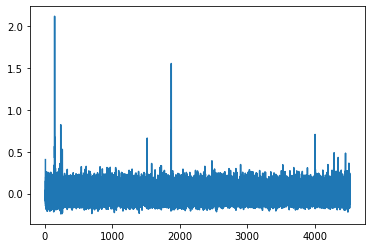

In [44]:
from google.colab import drive
drive.mount(r'/content/drive/My Drive')

ValueError: ignored

In [ ]:
np.unique(allNeural_data[0].cell_specimen_id)

array([1086547322, 1086547526, 1086547630, 1086547687, 1086547776,
       1086547796, 1086547901, 1086547993, 1086548072, 1086548118,
       1086548411, 1086548606, 1086548658, 1086548818, 1086548969,
       1086549154, 1086549252, 1086549303, 1086549379, 1086549491,
       1086549519, 1086549726, 1086549813, 1086549949, 1086550219,
       1086550346, 1086550391, 1086550473, 1086550481, 1086550544,
       1086550723, 1086551151, 1086551209, 1086551301, 1086551457,
       1086551540, 1086551645, 1086551913, 1086552021, 1086552408,
       1086552709, 1086552925, 1086553015, 1086553122, 1086553271,
       1086553523, 1086553602, 1086553722, 1086553836, 1086553907,
       1086555222, 1086555470, 1086555980, 1086556317, 1086556502,
       1086556532, 1086557013, 1086557083, 1086557208, 1086557304,
       1086557434, 1086557639, 1086557794, 1086557839, 1086557984,
       1086558114, 1086558224, 1086558510, 1086558955, 1086559064,
       1086559206, 1086559365, 1086559496, 1086559611, 1086559

In [ ]:
for session in range(len(allNeural_data)):
  neural_data = allNeural_data[session]
  for expID in np.unique(neural_data.ophys_experiment_id):
    print('Exp:', expID, ' Planes:', len(np.unique(neural_data.loc[neural_data.ophys_experiment_id == expID].imaging_depth)))

Exp: 850517344  Planes: 1
Exp: 850517346  Planes: 1
Exp: 850517348  Planes: 1
Exp: 850517350  Planes: 1
Exp: 850517352  Planes: 1
Exp: 850517354  Planes: 1
Exp: 850517358  Planes: 1
Exp: 851093285  Planes: 1
Exp: 851093287  Planes: 1
Exp: 851093289  Planes: 1
Exp: 851093291  Planes: 1
Exp: 853363739  Planes: 1
Exp: 853363743  Planes: 1
Exp: 853363745  Planes: 1
Exp: 853363747  Planes: 1
Exp: 853363749  Planes: 1
Exp: 853363751  Planes: 1
Exp: 853363756  Planes: 1
Exp: 853988430  Planes: 1
Exp: 853988437  Planes: 1
Exp: 853988446  Planes: 1
Exp: 853988448  Planes: 1
Exp: 853988454  Planes: 1
Exp: 854759890  Planes: 1
Exp: 854759894  Planes: 1
Exp: 854759896  Planes: 1
Exp: 854759898  Planes: 1
Exp: 854759900  Planes: 1
Exp: 854759903  Planes: 1


In [ ]:
for session in range(len(allNeural_data)):
  neural_data = allNeural_data[session]
  
  for depth in np.unique(neural_data.imaging_depth):
    exps = np.unique(neural_data.loc[neural_data.imaging_depth == depth].ophys_experiment_id)
    if len(exps) > 1:
      print('\n\nsession:', session, ' depth:', depth)
      totNeuron = []
      totNeuronCount = 0
      for expID in exps:
        neurons = np.unique(neural_data.loc[neural_data.ophys_experiment_id == expID].cell_specimen_id)
        totNeuronCount += len(neurons)
        totNeuron += [neurons]
        print('exp:', expID)
        print('Neurons: ', neurons)
      print('Neuron sharing: ', totNeuronCount - len(np.concatenate(totNeuron)) > 0)



session: 0  depth: 75
exp: 850517350
Neurons:  [1086552021 1086553015 1086553523 1086553722 1086553907 1086555222
 1086555470 1086555980 1086556317 1086556532 1086557013 1086557434
 1086557839 1086559641 1086559931]
exp: 850517358
Neurons:  [1086547687 1086547776 1086547901 1086548411 1086548606 1086548818
 1086549154 1086549252 1086549379 1086549519 1086550219 1086550473
 1086552925]
Neuron sharing:  False


session: 0  depth: 175
exp: 850517346
Neurons:  [1086556502 1086557083 1086557208 1086557304 1086557639 1086557794
 1086557984 1086558114 1086558224 1086558510 1086558955 1086559064
 1086559206 1086559365 1086559496 1086559611 1086559885 1086559968
 1086560593]
exp: 850517354
Neurons:  [1086547630 1086548072 1086548658 1086548969 1086549303 1086549491
 1086549813 1086549949 1086550346 1086551209 1086551457 1086551645
 1086552408]
Neuron sharing:  False


session: 0  depth: 275
exp: 850517344
Neurons:  [1086550481 1086551301]
exp: 850517352
Neurons:  [1086549726 1086550391 108655

In [ ]:
totNeuronCount = 0
totNeuron = []
for session in range(len(allNeural_data)):
  neural_data = allNeural_data[session]
  for expID in np.unique(neural_data.ophys_experiment_id):
    neurons = np.unique(neural_data.loc[neural_data.ophys_experiment_id == expID].cell_specimen_id)
    totNeuronCount += len(neurons)
    totNeuron += [neurons]

print('Neuron sharing: ', totNeuronCount - len(np.concatenate(totNeuron)))

Neuron sharing:  False


In [ ]:
neural_data

,timestamps,dff,events,filtered_events,cell_roi_id,cell_specimen_id,ophys_experiment_id,ophys_session_id,targeted_structure,imaging_depth,equipment_name,cre_line,mouse_id,sex
0,10.52216,0.400583,0.0,0.000000e+00,1080852071,1086550481,854759890,854060305,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
1,10.61538,0.126125,0.0,0.000000e+00,1080852071,1086550481,854759890,854060305,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
2,10.70860,-0.083087,0.0,0.000000e+00,1080852071,1086550481,854759890,854060305,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
3,10.80182,0.158960,0.0,0.000000e+00,1080852071,1086550481,854759890,854060305,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
4,10.89504,0.301507,0.0,0.000000e+00,1080852071,1086550481,854759890,854060305,VISp,275,MESO.1,Sst-IRES-Cre,440631,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48326,4517.21002,0.364505,0.0,4.071798e-03,1080855250,1086551209,854759903,854060305,VISl,167,MESO.1,Sst-IRES-Cre,440631,M
48327,4517.30327,0.486187,0.0,2.844570e-05,1080855250,1086551209,854759903,854060305,VISl,167,MESO.1,Sst-IRES-Cre,440631,M
48328,4517.39653,0.529427,0.0,2.728595e-08,1080855250,1086551209,854759903,854060305,VISl,167,MESO.1,Sst-IRES-Cre,440631,M
48329,4517.48979,0.522267,0.0,3.593799e-12,1080855250,1086551209,854759903,854060305,VISl,167,MESO.1,Sst-IRES-Cre,440631,M


In [ ]:
np.unique(neural_data.mouse_id)

array([440631])

In [ ]:
cell_specimen_id_tot = np.concatenate(all_cell_specimen_id)
print(len(np.unique(cell_specimen_id_tot)), len(cell_specimen_id_tot))

137 331


In [ ]:
stimulus_table = experiments[ophys_experiment_ids[0]].stimulus_presentations.drop(columns = ['image_set'])  # dropping the 'image_set' column to avoid confusion. Image_set column contains a unique string for set of images presented in a session.


NameError: ignored

In [ ]:
full_etr_l = []
# iterate over each unique cell
for cell_specimen_id in tqdm(neural_data['cell_specimen_id'].unique()):
  # calculate the event triggered response for this cell to every stimulus
  full_etr_this_cell = mindscope_utilities.event_triggered_response(
      neural_data.query('cell_specimen_id == @cell_specimen_id'),
      t='timestamps',
      y='dff',
      event_times=stimulus_table['start_time'],
      t_before=0,
      t_after=0.75,
      output_sampling_rate=30
  )
  # add a column identifying the cell_specimen_id
  full_etr_this_cell['cell_specimen_id'] = cell_specimen_id
  # append to our list
  full_etr_l.append(full_etr_this_cell)

# concatenate our list of dataframes into a single dataframe
full_etr = pd.concat(full_etr_l)

# cast these numeric columns to int and float, respectively
full_etr['event_number'] = full_etr['event_number'].astype(int)
full_etr['event_time'] = full_etr['event_number'].astype(float)

# rename 'event_number' as
# full_etr.rename(columns={'event_number': 'stimulus_presentations_id'}, inplace=True)